In [ ]:
https://github.com/yohman/remote-sensing-ndwi/blob/main/ndwi.ipynb

In [522]:
import pandas as pd

import geopandas as gpd

# earth engine
import ee

# allow images to display in the notebook
from IPython.display import Image,display

import math
import numpy
from matplotlib import pyplot
import ee



Time Series wit
https://github.com/tylere/ee-jupyter-examples/blob/master/3%20-%20Example%20Time%20Series%20-%20Landsat.ipynb


Deep learning with satelites images

https://github.com/tylere/ee-jupyter-examples/tree/master

https://github.com/prodramp/DeepWorks/tree/main/DL-SatelliteImagery


Unsupervised Learning in Satellite Imagery using Python

https://github.com/syamkakarla98/Satellite_Imagery_Analysis/blob/main/code/Unsupervised_Learning_in_Satellite_Imagery_using_Python.ipynb

Land Cover Classification in Satellite Imagery using Python

https://github.com/syamkakarla98/Satellite_Imagery_Analysis/blob/main/Classification/Land_Cover_Classification_in_Satellite_Imagery_using_Python.ipynb


Coastline extraction using Landsat-8 multispectral imagery and band ratio technique

https://developers.arcgis.com/python/samples/coastline-extraction-usa-landsat8-multispectral-imagery/


Para obtener información sobre Earth Engine Python API, modelos y series de tiempo

https://developers.google.com/earth-engine/tutorials/community/intro-to-python-api


https://www.youtube.com/watch?v=gi4UdFsayoM


Earth Engine 101

https://github.com/tylere/ee-jupyter-examples/blob/master/2%20-%20EE%20101.ipynb

https://notebook.community/tylere/ee-jupyter-examples/2%20-%20EE%20101


In [523]:
ee.Authenticate()

ee.Initialize()

Enter verification code: 4/1AbUR2VPhfVC4ncwdcqKo6aaHZldRoEuTo-TdBdkqKSQa1qm3Y3zBdEJZfPM

Successfully saved authorization token.


Analisis de imágenes del satélite Landsat

https://github.com/tylere/ee-jupyter-examples/blob/master/3%20-%20Example%20Time%20Series%20-%20Landsat.ipynb

In [524]:

#San Fernando, chile ; Latitud & longitud: -34.5858603, -70.9907801

#Plaza San Fernando -34.583939, -70.989067

lat =  -34.583939
lon = -70.989067

# point of interest as an ee.Geometry
point = ee.Geometry.Point(lon,lat)

# start date of range to filter for
start_date = '2022-01-01'

# end date
end_date = '2023-05-31'

In [525]:
# get the satellite data
landsat = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2")\
            .filterBounds(point)\
            .filterDate(start_date,end_date)


In [526]:
# how many images did we get?
print('Total number:', landsat.size().getInfo())

Total number: 30


In [479]:
# information about the first image in our collection
landsat.first().getInfo()

{'type': 'Image',
 'bands': [{'id': 'SR_B1',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 65535},
   'dimensions': [7661, 7721],
   'crs': 'EPSG:32619',
   'crs_transform': [30, 0, 193785, 0, -30, -3716385]},
  {'id': 'SR_B2',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 65535},
   'dimensions': [7661, 7721],
   'crs': 'EPSG:32619',
   'crs_transform': [30, 0, 193785, 0, -30, -3716385]},
  {'id': 'SR_B3',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 65535},
   'dimensions': [7661, 7721],
   'crs': 'EPSG:32619',
   'crs_transform': [30, 0, 193785, 0, -30, -3716385]},
  {'id': 'SR_B4',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 65535},
   'dimensions': [7661, 7721],
   'crs': 'EPSG:32619',
   'crs_transform': [30, 0, 193785, 0, -30, -3716385]},
  {'id': 'SR_B5',
   'data_type': {'type': 'PixelType',
    'precision': 'int

In [480]:
# what about cloud cover of our first image?
landsat.first().get('CLOUD_COVER').getInfo()

15.15

In [481]:
# when was this image taken?
landsat.first().get('DATE_ACQUIRED').getInfo()

'2022-01-15'

In [527]:
# what bands did we get?
landsat.first().bandNames().getInfo()

['SR_B1',
 'SR_B2',
 'SR_B3',
 'SR_B4',
 'SR_B5',
 'SR_B6',
 'SR_B7',
 'SR_QA_AEROSOL',
 'ST_B10',
 'ST_ATRAN',
 'ST_CDIST',
 'ST_DRAD',
 'ST_EMIS',
 'ST_EMSD',
 'ST_QA',
 'ST_TRAD',
 'ST_URAD',
 'QA_PIXEL',
 'QA_RADSAT']

In [528]:
# put the images in a list
landsat_list = landsat.toList(landsat.size());

In [530]:
print(landsat_list)

ee.List({
  "functionInvocationValue": {
    "functionName": "Collection.toList",
    "arguments": {
      "collection": {
        "functionInvocationValue": {
          "functionName": "Collection.filter",
          "arguments": {
            "collection": {
              "functionInvocationValue": {
                "functionName": "Collection.filter",
                "arguments": {
                  "collection": {
                    "functionInvocationValue": {
                      "functionName": "ImageCollection.load",
                      "arguments": {
                        "id": {
                          "constantValue": "LANDSAT/LC08/C02/T1_L2"
                        }
                      }
                    }
                  },
                  "filter": {
                    "functionInvocationValue": {
                      "functionName": "Filter.intersects",
                      "arguments": {
                        "leftField": {
                        

In [531]:
# set some parameters for the images
parameters = {
                'min': 7000,
                'max': 16000,
                'dimensions': 800, # square size in pixels
                'bands': ['SR_B4', 'SR_B3', 'SR_B2'] # bands to display (r,g,b)
             }

In [532]:
# create an empty data container
data = []

# loop through each image and display it
for i in range(landsat.size().getInfo()):

    # when was this image taken?
    date = ee.Image(landsat_list.get(i)).get('DATE_ACQUIRED').getInfo()
    
    # cloud cover
    cloud = ee.Image(landsat_list.get(i)).get('CLOUD_COVER').getInfo()
    
    ndwi = ee.Image(sentinel_list.get(i)).normalizedDifference(['B3', 'B8'])
    
    ndwi = ee.Image(landsat_list.get(i)).normalizedDifference(['SR_B5', 'SR_B4'])
    # print the image info
    print('Image #',i,date,'Cloud cover:',cloud)
    
    # display the image
    #display(Image(url = ee.Image(landsat_list.get(i)).getThumbUrl(parameters)))

    # data to list
    this_data = [i,date,cloud]

    # append the data 
    data.append(this_data)
    

# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Image #', 'Date', 'Cloud Cover'])

Image # 0 2022-01-15 Cloud cover: 15.15
Image # 1 2022-01-31 Cloud cover: 0.18
Image # 2 2022-02-16 Cloud cover: 0.36
Image # 3 2022-03-04 Cloud cover: 13.15
Image # 4 2022-03-20 Cloud cover: 69.23
Image # 5 2022-04-05 Cloud cover: 0.52
Image # 6 2022-05-07 Cloud cover: 28.8
Image # 7 2022-05-23 Cloud cover: 98.64
Image # 8 2022-06-08 Cloud cover: 45.59
Image # 9 2022-06-24 Cloud cover: 65.66
Image # 10 2022-07-26 Cloud cover: 76.08
Image # 11 2022-08-11 Cloud cover: 16.98
Image # 12 2022-08-27 Cloud cover: 10.17
Image # 13 2022-09-12 Cloud cover: 10.68
Image # 14 2022-09-28 Cloud cover: 29.4
Image # 15 2022-10-14 Cloud cover: 3.07
Image # 16 2022-10-30 Cloud cover: 26.33
Image # 17 2022-11-15 Cloud cover: 5.38
Image # 18 2022-12-01 Cloud cover: 1.96
Image # 19 2022-12-17 Cloud cover: 28.98
Image # 20 2023-01-02 Cloud cover: 1.83
Image # 21 2023-01-18 Cloud cover: 6.48
Image # 22 2023-02-03 Cloud cover: 5.47
Image # 23 2023-02-19 Cloud cover: 3.87
Image # 24 2023-03-07 Cloud cover: 14.

In [486]:
df

,Image #,Date,Cloud Cover
0,0,2022-01-15,15.15
1,1,2022-01-31,0.18
2,2,2022-02-16,0.36
3,3,2022-03-04,13.15
4,4,2022-03-20,69.23
5,5,2022-04-05,0.52
6,6,2022-05-07,28.80
7,7,2022-05-23,98.64
8,8,2022-06-08,45.59
9,9,2022-06-24,65.66


(array([12.,  6.,  4.,  0.,  2.,  1.,  1.,  3.,  0.,  1.]),
 array([ 0.18 , 10.026, 19.872, 29.718, 39.564, 49.41 , 59.256, 69.102,
        78.948, 88.794, 98.64 ]),
 <BarContainer object of 10 artists>)

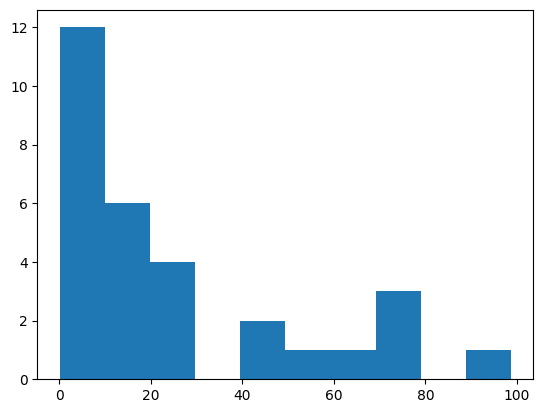

In [533]:
plt.hist(df["Cloud Cover"])

In [534]:
parameters = {
                'min': 6000,
                'max': 16000,
                'dimensions': 800,
                'bands': ['SR_B4', 'SR_B3', 'SR_B2'],
                'region':roi
             }

In [535]:
for i in range(0,6): #landsat.size().getInfo()):

    # when was this image taken?
    date = ee.Image(landsat_list.get(i)).get('DATE_ACQUIRED').getInfo()
    
    # print some information
    print('Image #',i,date)
    
    # display the image
    display(Image(url=ee.Image(landsat_list.get(i)).normalizedDifference(['SR_B5', 'SR_B4']).getThumbUrl(ndvi_parameters)))



Image # 0 2022-01-15


Image # 1 2022-01-31


Image # 2 2022-02-16


Image # 3 2022-03-04


Image # 4 2022-03-20


Image # 5 2022-04-05


## Podemos extraer directamente la información de un punto de interés

In [496]:
info = landsat.getRegion(point,800).getInfo()

In [497]:
print(info)

[['id', 'longitude', 'latitude', 'time', 'SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7', 'SR_QA_AEROSOL', 'ST_B10', 'ST_ATRAN', 'ST_CDIST', 'ST_DRAD', 'ST_EMIS', 'ST_EMSD', 'ST_QA', 'ST_TRAD', 'ST_URAD', 'QA_PIXEL', 'QA_RADSAT'], ['LC08_233084_20220115', -70.99206027339754, -34.58513843860158, 1642257257696, 9875, 10548, 11819, 12585, 15572, 15901, 14878, 96, 47416, 7687, 1432, 879, 9694, 79, 192, 10226, 1810, 21824, 0], ['LC08_233084_20220131', -70.99206027339754, -34.58513843860158, 1643639652769, 10064, 10747, 11984, 12838, 15255, 16116, 15314, 96, 47061, 8519, 1205, 573, 9676, 85, 201, 10275, 1127, 21824, 0], ['LC08_233084_20220216', -70.99206027339754, -34.58513843860158, 1645022048213, 9913, 10473, 11610, 12456, 15387, 15737, 14805, 96, 45701, 8991, 630, 425, 9709, 77, 216, 9874, 808, 21824, 0], ['LC08_233084_20220304', -70.99206027339754, -34.58513843860158, 1646404445018, 9832, 10403, 11532, 12301, 15118, 15415, 14382, 160, 46135, 7186, 1434, 1025, 9707, 77, 204,

In [539]:
# extract the header column names
header = info[0]

print(info[0])

['id', 'longitude', 'latitude', 'time', 'SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7', 'SR_QA_AEROSOL', 'ST_B10', 'ST_ATRAN', 'ST_CDIST', 'ST_DRAD', 'ST_EMIS', 'ST_EMSD', 'ST_QA', 'ST_TRAD', 'ST_URAD', 'QA_PIXEL', 'QA_RADSAT']


In [540]:
# create a Numpy array of the data
data = array(info[1:])

In [541]:
print(data)

[['LC08_232084_20130402' '-70.98711953933488' '-34.58289265039128' ...
  '1270' '21824' '0']
 ['LC08_233084_20130412' '-70.98711953933488' '-34.58289265039128' ...
  '502' '21824' '0']
 ['LC08_233084_20130428' '-70.98711953933488' '-34.58289265039128' ...
  '671' '55052' '0']
 ...
 ['LC08_233084_20221217' '-70.98711953933488' '-34.58289265039128' ...
  '1547' '21824' '0']
 ['LC08_233084_20230102' '-70.98711953933488' '-34.58289265039128' ...
  '1033' '21824' '0']
 ['LC08_233084_20230118' '-70.98711953933488' '-34.58289265039128' ...
  '1094' '21824' '0']]


In [542]:
xBand = 'time'
yBandList = ['SR_B1',
             'SR_B2',
             'SR_B3',
             'SR_B4',
             'SR_B5',
             'SR_B6',
             'SR_B7',
             'SR_QA_AEROSOL',
             'ST_B10',
             'ST_ATRAN',
             'ST_CDIST',
             'ST_DRAD',
             'ST_EMIS',
             'ST_EMSD',
             'ST_QA',
             'ST_TRAD',
             'ST_URAD',
             'QA_PIXEL',
             'QA_RADSAT']

In [543]:
iBands = [header.index(b) for b in yBandList]
yData = data[0:,iBands].astype(np.float)

In [504]:
band3 = yData[:,2]
band4 = yData[:,3]
ndvi = (band4 - band3) / (band4 + band3)

In [544]:
# extract the time information
iTime = header.index('time')
# convert to Python datetime objects
time = [datetime.datetime.fromtimestamp(i/1000) for i in (data[0:,iTime].astype(int))]

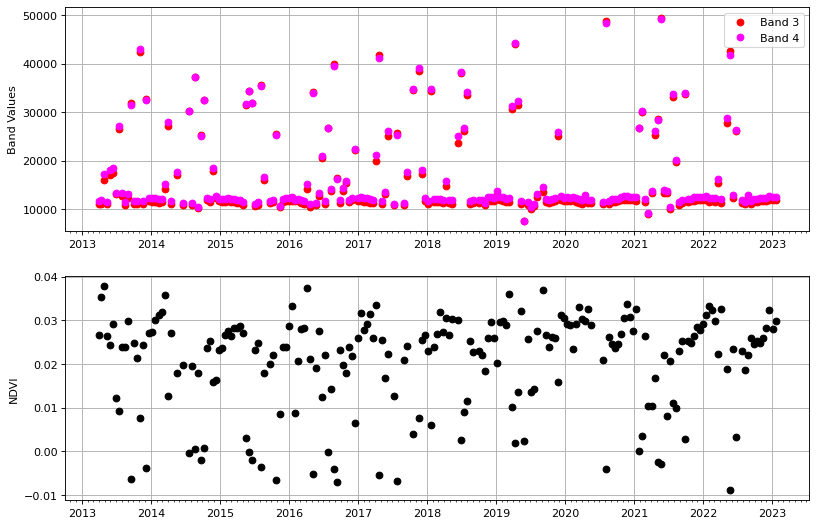

In [545]:
# matplotlib date format object

fig = figure(figsize=(12,8), dpi=80)

# plot the band values
ax1 = fig.add_subplot(211)
ax1.plot(time, yData[:,2], 'o', color="red", label="Band 3")
ax1.plot(time, yData[:,3], 'o', color="magenta",  label="Band 4")
ax1.legend(loc='best')
ax1.grid(True)

#plt.title('Band values as a function of time')
ax1.set_ylabel('Band Values')

# plot NDVI
ax2 = fig.add_subplot(212, sharex=ax1)
ax2.plot(time, ndvi, 'o', color="black", label="NDVI")
ax2.grid(True)
start, end = ax2.get_xlim()
ax2.xaxis.set_ticks(np.arange(start, end, 64.5))

# Format the ticks.
years    = mdates.YearLocator()   # every year
months   = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

ax2.set_ylabel('NDVI')

ax2.xaxis.set_major_locator(years)
ax2.xaxis.set_major_formatter(yearsFmt)
ax2.xaxis.set_minor_locator(months)

In [510]:
import datetime
from matplotlib import dates
import matplotlib.dates as mdates
from pylab import *

In [511]:
xBand = 'time'
yBandList = [
        'SR_B1',
        u'SR_B2',
        u'SR_B3',
        u'SR_B4',
        u'SR_B5',
        u'SR_B6',
        u'SR_B7',
        u'SR_QA_AEROSOL',
        u'ST_B10',
    ]

# start date of range to filter for
start_date = '2000-12-01'

# end date
end_date = '2023-01-31'
#startTime = datetime.datetime(2022, 1, 1)
#endTime = datetime.datetime(2023, 1, 1)

In [512]:
landsat = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2")\
            .filterBounds(poi)\
            .filterDate(start_date,end_date)

In [513]:
collection = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2').filterDate(start_date,end_date)
#point = {'type':'Point', 'coordinates':[ -34.5858603,-70.9907801]};  # death valley (should be stable)

# point of interest as an ee.Geometry
point = ee.Geometry.Point(lon,lat)

info = collection.getRegion(point,500).getInfo()

In [514]:
collection.size()

In [515]:
# how many images did we get?
print('Total number:', collection.size().getInfo())

Total number: 1505206


In [516]:
# extract the header column names
header = info[0]
# create a Numpy array of the data
data = array(info[1:])

In [517]:
print(header)

['id', 'longitude', 'latitude', 'time', 'SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7', 'SR_QA_AEROSOL', 'ST_B10', 'ST_ATRAN', 'ST_CDIST', 'ST_DRAD', 'ST_EMIS', 'ST_EMSD', 'ST_QA', 'ST_TRAD', 'ST_URAD', 'QA_PIXEL', 'QA_RADSAT']


In [518]:
# extract the time information
iTime = header.index('time')
# convert to Python datetime objects
time = [datetime.datetime.fromtimestamp(i/1000) for i in (data[0:,iTime].astype(int))]

In [519]:
iBands = [header.index(b) for b in yBandList]
yData = data[0:,iBands].astype(np.float)

## Hacemos el calculo del estadistico deseado, NDVI

In [520]:
band3 = yData[:,2]
band4 = yData[:,3]
ndvi = (band4 - band3) / (band4 + band3)

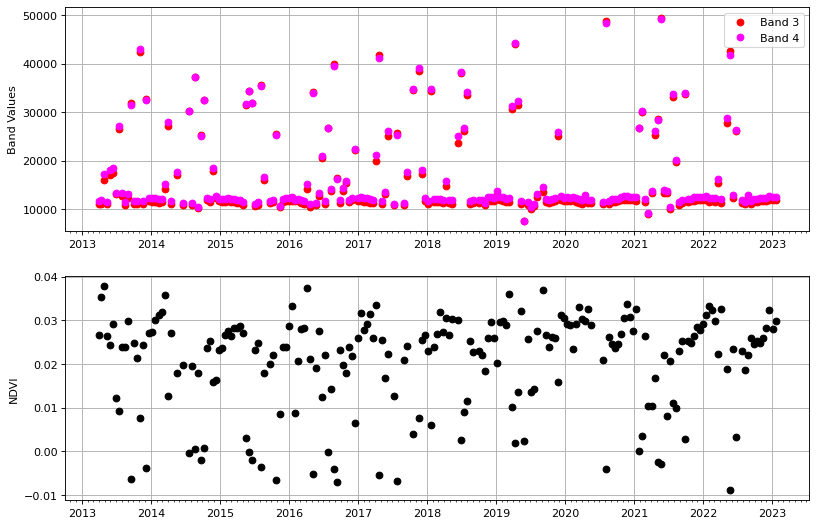

In [521]:
# matplotlib date format object

fig = figure(figsize=(12,8), dpi=80)

# plot the band values
ax1 = fig.add_subplot(211)
ax1.plot(time, yData[:,2], 'o', color="red", label="Band 3")
ax1.plot(time, yData[:,3], 'o', color="magenta",  label="Band 4")
ax1.legend(loc='best')
ax1.grid(True)

#plt.title('Band values as a function of time')
ax1.set_ylabel('Band Values')

# plot NDVI
ax2 = fig.add_subplot(212, sharex=ax1)
ax2.plot(time, ndvi, 'o', color="black", label="NDVI")
ax2.grid(True)
start, end = ax2.get_xlim()
ax2.xaxis.set_ticks(np.arange(start, end, 64.5))

# Format the ticks.
years    = mdates.YearLocator()   # every year
months   = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

ax2.set_ylabel('NDVI')

ax2.xaxis.set_major_locator(years)
ax2.xaxis.set_major_formatter(yearsFmt)
ax2.xaxis.set_minor_locator(months)

In [ ]:
https://github.com/yohman/remote-sensing-ndwi/blob/main/ndwi.ipynb

In [546]:
# coordinates 
lat =  -34.5858603
lon = -70.9907801

# point of interest as an ee.Geometry
point = ee.Geometry.Point(lon,lat)

# start date of range to filter for
start_date = '2000-01-01'

# end date
end_date = '2023-05-31'

In [564]:
# Define a region of interest with a buffer zone.
roi = point.buffer(1500) # meters

In [565]:
sentinel = ee.ImageCollection("COPERNICUS/S2_SR")\
            .filterBounds(roi)\
            .filterDate(start_date,end_date)\
            .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20))

In [566]:
# how many images did we get?
print('Total number:', sentinel.size().getInfo())

Total number: 179


In [567]:
# put the images in a list
sentinel_list = sentinel.toList(sentinel.size());

In [586]:
# set some parameters for image
parameters = {
                'min': 0,
                'max': 2500,
                'dimensions': 1000,
                'bands': ['B4', 'B3', 'B2'],
                'region':roi
             }

In [587]:
# work with dates
from datetime import datetime as dt


In [588]:
# loop through each image and display it
for i in range(2):#sentinel.size().getInfo()):

    # when was this image taken?
    date = ee.Date(ee.Image(sentinel_list.get(i)).get('system:time_start'))
    time = date.getInfo()['value']/1000
    date = dt.utcfromtimestamp(time).strftime('%Y-%m-%d %H:%M:%S')
    
    # cloud cover
    cloud = ee.Image(sentinel_list.get(i)).get('CLOUDY_PIXEL_PERCENTAGE').getInfo()
    
    print('Image #',i,date,'Cloud cover:',cloud)
    
    display(Image(url = ee.Image(sentinel_list.get(i)).getThumbUrl(parameters)))

Image # 0 2018-12-15 14:52:27 Cloud cover: 3.871602


Image # 1 2018-12-20 14:52:24 Cloud cover: 4.439361


In [589]:
# ndwi palette: red is low water, blue is high water
palette = ['red', 'yellow', 'green', 'blue'];

# notice, no bands here because we will calculate ndwi per image
ndwi_parameters = {'min': -1,
                   'max': 0.5,
                   'dimensions': 1000,
                   'palette': palette,
                   'region': roi}

In [590]:
# loop through each image and display it
for i in range(2):#sentinel.size().getInfo()):

    # first, calculate ndwi for each image
    ndwi = ee.Image(sentinel_list.get(i)).normalizedDifference(['B3', 'B8'])
    
    # when was this image taken?
    date = ee.Date(ee.Image(sentinel_list.get(i)).get('system:time_start'))
    time = date.getInfo()['value']/1000
    date = dt.utcfromtimestamp(time).strftime('%Y-%m-%d %H:%M:%S')
    
    # print some information
    print('Image #',i,date)
    
    # display the image
    display(Image(url=ndwi.getThumbUrl(ndwi_parameters)))

Image # 0 2018-12-15 14:52:27


Image # 1 2018-12-20 14:52:24


In [574]:
info = sentinel.getRegion(point,800).getInfo()

In [575]:
print(info)

[['id', 'longitude', 'latitude', 'time', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12', 'AOT', 'WVP', 'SCL', 'TCI_R', 'TCI_G', 'TCI_B', 'MSK_CLDPRB', 'MSK_SNWPRB', 'QA10', 'QA20', 'QA60'], ['20181215T143749_20181215T144702_T19HCB', -70.99206027339754, -34.58513843860158, 1544885547000, 1164, 1393, 1611, 1818, 2013, 2289, 2392, 2437, 2406, 2398, 2860, 2828, 80, 1168, 5, 173, 155, 136, 5, 0, 0, 0, 0], ['20181220T143741_20181220T144648_T19HCB', -70.99206027339754, -34.58513843860158, 1545317544000, 1224, 1389, 1633, 1839, 2048, 2326, 2414, 2467, 2445, 2429, 2828, 2727, 109, 1074, 5, 176, 157, 135, 6, 0, 0, 0, 0], ['20181225T143749_20181225T144653_T19HCB', -70.99206027339754, -34.58513843860158, 1545749549000, 1144, 1388, 1613, 1812, 2016, 2277, 2387, 2395, 2395, 2394, 2856, 2813, 126, 1594, 5, 173, 156, 136, 5, 0, 0, 0, 0], ['20181230T143751_20181230T144650_T19HCB', -70.99206027339754, -34.58513843860158, 1546181547000, 1176, 1359, 1616, 1825, 2018, 2285, 2375,

In [576]:
# extract the header column names
header = info[0]

print(info[0])

['id', 'longitude', 'latitude', 'time', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12', 'AOT', 'WVP', 'SCL', 'TCI_R', 'TCI_G', 'TCI_B', 'MSK_CLDPRB', 'MSK_SNWPRB', 'QA10', 'QA20', 'QA60']


In [577]:
# create a Numpy array of the data
data = array(info[1:])

In [578]:
print(data)

[['20181215T143749_20181215T144702_T19HCB' '-70.99206027339754'
  '-34.58513843860158' ... '0' '0' '0']
 ['20181220T143741_20181220T144648_T19HCB' '-70.99206027339754'
  '-34.58513843860158' ... '0' '0' '0']
 ['20181225T143749_20181225T144653_T19HCB' '-70.99206027339754'
  '-34.58513843860158' ... '0' '0' '0']
 ...
 ['20230503T143729_20230503T144923_T19HCB' '-70.99206027339754'
  '-34.58513843860158' ... '0' '0' '0']
 ['20230508T143731_20230508T144916_T19HCB' '-70.99206027339754'
  '-34.58513843860158' ... '0' '0' '0']
 ['20230513T143729_20230513T144624_T19HCB' '-70.99206027339754'
  '-34.58513843860158' ... '0' '0' '0']]


In [579]:
sentinel.first().bandNames().getInfo()

['B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'B6',
 'B7',
 'B8',
 'B8A',
 'B9',
 'B11',
 'B12',
 'AOT',
 'WVP',
 'SCL',
 'TCI_R',
 'TCI_G',
 'TCI_B',
 'MSK_CLDPRB',
 'MSK_SNWPRB',
 'QA10',
 'QA20',
 'QA60']

In [582]:
xBand = 'time'
yBandList = ['B1',
             'B2',
             'B3',
             'B4',
             'B5',
             'B6',
             'B7',
             'B8',
             'B8A',
             'B9',
             'B11',
             'B12',
             'AOT',
             'WVP',
             'SCL',
             'TCI_R',
             'TCI_G',
             'TCI_B',
             'MSK_CLDPRB',
             'MSK_SNWPRB',
             'QA10',
             'QA20',
             'QA60']

In [583]:
iBands = [header.index(b) for b in yBandList]
yData = data[0:,iBands].astype(np.float)

In [584]:
band3 = yData[:,2]
band4 = yData[:,3]
ndvi = (band4 - band3) / (band4 + band3)

In [585]:
# extract the time information
iTime = header.index('time')
# convert to Python datetime objects
time = [datetime.datetime.fromtimestamp(i/1000) for i in (data[0:,iTime].astype(int))]